# Principal Component Analysis

In [94]:
import pandas as pd

In [ ]:
df = pd.read_csv('C:/CUB/sem2/ml/proj/CN_Dataset/cleaned_data.csv')

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


all_columns =['Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points']
full_data = df[all_columns]
labels = df['SuggestedJobRole']

full_data.head()

,Logical quotient rating,hackathons,coding skills rating,public speaking points
0,7,2,9,9
1,5,3,1,3
2,1,6,9,6
3,3,0,6,6
4,2,3,9,7


In [ ]:
scaler = StandardScaler()
full_data_scaled = scaler.fit_transform(full_data)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(full_data_scaled)
print('Variance explained by 2 components:', pca.explained_variance_ratio_)

principal_components_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
principal_components_df.head()

Variance explained by 2 components: [0.25998284 0.25357075]


,PC1,PC2
0,-1.041580,1.291357
1,-0.101580,-0.879946
2,1.754296,-0.411366
3,-0.377867,0.347243
4,0.657631,0.274378


In [ ]:
pca_3 = PCA(n_components=3)
principal_components_3 = pca_3.fit_transform(full_data_scaled)
print('Variance explained by 3 components:', pca_3.explained_variance_ratio_)

principal_components_df_3 = pd.DataFrame(principal_components_3, columns=['PC1', 'PC2', 'PC3'])
print(principal_components_df_3.head())

Variance explained by 3 components: [0.25998284 0.25357075 0.24670044]
        PC1       PC2       PC3
0 -1.041580  1.291357  0.896816
1 -0.101580 -0.879946 -0.680644
2  1.754296 -0.411366  1.103841
3 -0.377867  0.347243 -1.263433
4  0.657631  0.274378  0.212870


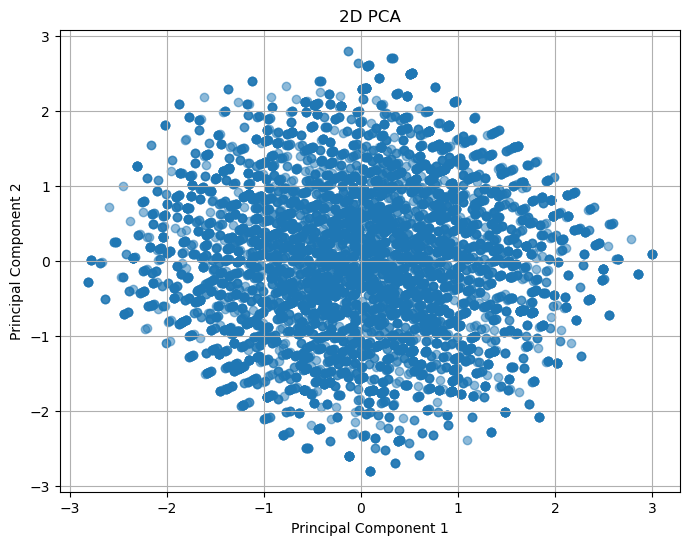

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
plt.title('2D PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

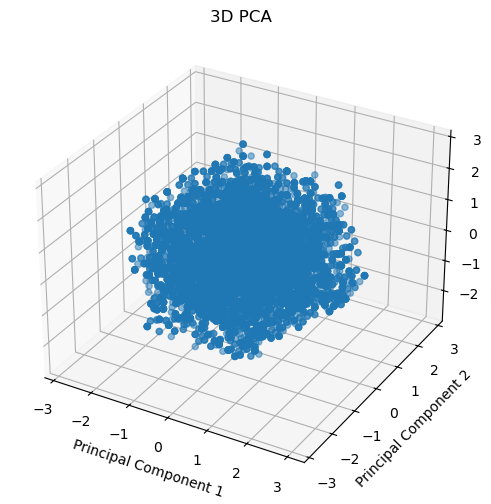

In [100]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principal_components_3[:, 0], principal_components_3[:, 1], principal_components_3[:, 2], alpha=0.5)
ax.set_title('3D PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

In [101]:
variance_2d = pca.explained_variance_ratio_.sum() * 100
variance_3d = pca_3.explained_variance_ratio_.sum() * 100
print(f"Percentage of variance retained in 2D PCA: {variance_2d:.2f}%")
print(f"Percentage of variance retained in 3D PCA: {variance_3d:.2f}%")


Percentage of variance retained in 2D PCA: 51.36%
Percentage of variance retained in 3D PCA: 76.03%


In [102]:
import numpy as np
pca_full = PCA().fit(full_data_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_) * 100
n_components_95 = np.where(cumulative_variance >= 95)[0][0] + 1
print(f"Number of components needed to retain at least 95% variance: {n_components_95}")


Number of components needed to retain at least 95% variance: 4


In [103]:
top_three_eigenvalues = pca_full.explained_variance_[:3]
print(f"Top three eigenvalues: {top_three_eigenvalues}")

Top three eigenvalues: [1.04003538 1.01438443 0.98690046]


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
data_normalized = scaler.fit_transform(full_data)

pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_normalized)
variance_pct = sum(pca.explained_variance_ratio_) * 100
print(f"Retained variance after PCA: {variance_pct:.2f}%")


Retained variance after PCA: 76.03%


# Clustering Techniques

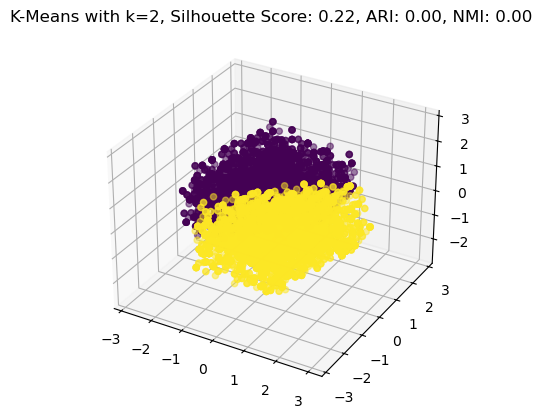

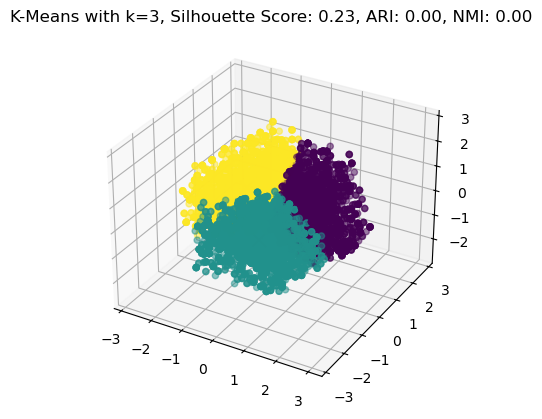

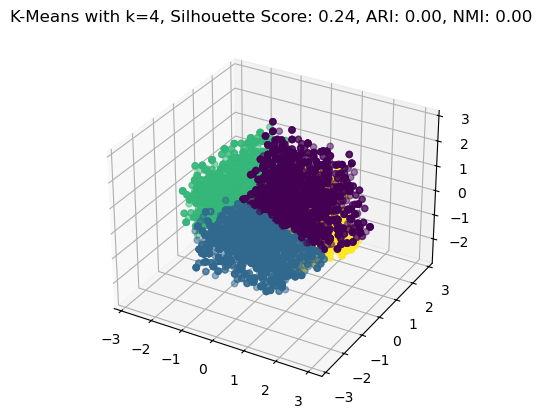

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


scaler = StandardScaler()
data_normalized = scaler.fit_transform(full_data)

pca = PCA(n_components=3)
x_pca3 = pca.fit_transform(data_normalized)

k_values = [2, 3, 4]
kmeans_scores = {}
kmeans_ari_scores = {}
kmeans_nmi_scores = {}
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters_kmeans = kmeans.fit_predict(x_pca3)
    score = silhouette_score(x_pca3, clusters_kmeans)
    ari_score = adjusted_rand_score(labels, clusters_kmeans)
    nmi_score = normalized_mutual_info_score(labels, clusters_kmeans)
    kmeans_scores[k] = score
    kmeans_ari_scores[k] = ari_score
    kmeans_nmi_scores[k] = nmi_score

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_pca3[:, 0], x_pca3[:, 1], x_pca3[:, 2], c=clusters_kmeans, cmap='viridis', alpha=0.5)
    centroids = kmeans.cluster_centers_
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', s=100, marker='x')  # Plot centroids
    ax.set_title(f'K-Means with k={k}, Silhouette Score: {score:.2f}, ARI: {ari_score:.2f}, NMI: {nmi_score:.2f}')
    plt.show()




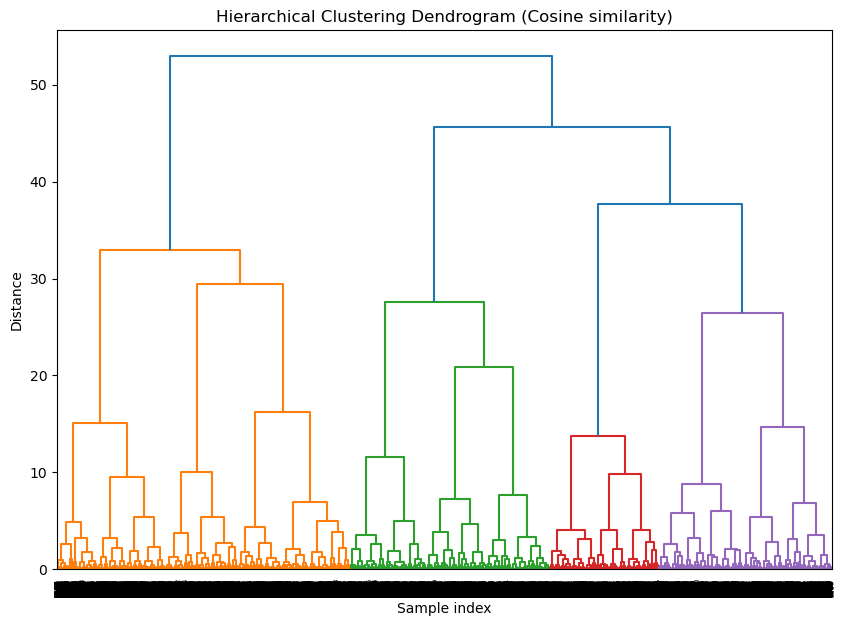

Hierarchical Clustering Silhouette Score (cosine): 0.22
ARI: 0.00
NMI: 0.00


In [109]:
distance_matrix = pdist(data_normalized, metric='cosine')

Z = linkage(distance_matrix, method='ward')
clusters_hierarchical = fcluster(Z, t=3, criterion='maxclust')

hierarchical_score = silhouette_score(data_normalized, clusters_hierarchical, metric='cosine')
hierarchical_ari = adjusted_rand_score(labels, clusters_hierarchical)
hierarchical_nmi = normalized_mutual_info_score(labels, clusters_hierarchical)

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Cosine similarity)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

print(f"Hierarchical Clustering Silhouette Score (cosine): {hierarchical_score:.2f}")
print(f"ARI: {hierarchical_ari:.2f}")
print(f"NMI: {hierarchical_nmi:.2f}")


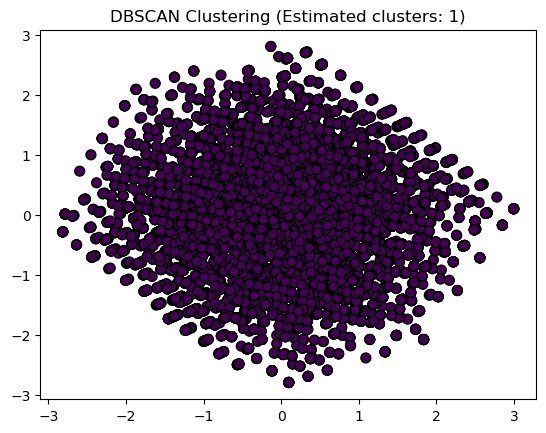

DBSCAN Clustering - Silhouette Score: -1.00, ARI: 0.00, NMI: 0.00
Unique labels found: [0]


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
import numpy as np
import matplotlib.pyplot as plt

dbscan = DBSCAN(eps=0.5, min_samples=5) 
clusters_dbscan = dbscan.fit_predict(x_pca3)

unique_labels = np.unique(clusters_dbscan)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0) 

if n_clusters >= 2:
    dbscan_score = silhouette_score(x_pca3, clusters_dbscan)
else:
    dbscan_score = -1  

dbscan_ari = adjusted_rand_score(labels, clusters_dbscan)
dbscan_nmi = normalized_mutual_info_score(labels, clusters_dbscan)

plt.figure()
plt.scatter(x_pca3[:, 0], x_pca3[:, 1], c=clusters_dbscan, cmap='viridis', marker='o', s=50, edgecolor='k')
plt.title(f'DBSCAN Clustering (Estimated clusters: {n_clusters})')
plt.show()

print(f"DBSCAN Clustering - Silhouette Score: {dbscan_score:.2f}, ARI: {dbscan_ari:.2f}, NMI: {dbscan_nmi:.2f}")
print(f"Unique labels found: {unique_labels}")

In [ ]:
print("Summary of Clustering Comparisons with True Labels:")
print("K-means ARI scores:", kmeans_ari_scores)
print("K-means NMI scores:", kmeans_nmi_scores)
print("Hierarchical ARI:", hierarchical_ari)
print("Hierarchical NMI:", hierarchical_nmi)
print("DBSCAN ARI:", dbscan_ari)
print("DBSCAN NMI:", dbscan_nmi)

Summary of Clustering Comparisons with True Labels:
K-means ARI scores: {2: 0.00034144021597737, 3: 0.001117345425816583, 4: 0.0013754832582223587}
K-means NMI scores: {2: 0.0007803923582113197, 3: 0.0020261093018522133, 4: 0.0021197859234629445}
Hierarchical ARI: 0.0014613163342736997
Hierarchical NMI: 0.0022791632462888824
DBSCAN ARI: 0.0
DBSCAN NMI: 0.0


# Associated Rule Mining

In [112]:
! pip install pyvis

   ---------------------------------------- 0.0/756.0 kB ? eta -:--:--
   - -------------------------------------- 30.7/756.0 kB 1.3 MB/s eta 0:00:01
   ----- ---------------------------------- 102.4/756.0 kB 1.5 MB/s eta 0:00:01
   --------------- ------------------------ 286.7/756.0 kB 2.2 MB/s eta 0:00:01
   ----------------------------- ---------- 563.2/756.0 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------  747.5/756.0 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 756.0/756.0 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/46.3 kB ? eta -:--:--
   ---------------------------------------- 46.3/46.3 kB 2.4 MB/s eta 0:00:00


Transaction data has been prepared and saved.
       0      1      2      3      4      5      6      7      8      9  ...  \
0  False  False   True  False  False  False  False   True  False   True  ...   
1  False   True  False   True  False   True  False  False  False  False  ...   
2  False   True  False  False  False  False   True  False  False   True  ...   
3   True  False  False   True  False  False   True  False  False  False  ...   
4  False  False   True   True  False  False  False   True  False   True  ...   

   r programming  science, ms, bachelor, ba, degree, computer science  \
0          False                                              False     
1          False                                              False     
2          False                                              False     
3          False                                              False     
4          False                                              False     

   security  shell programming  sm

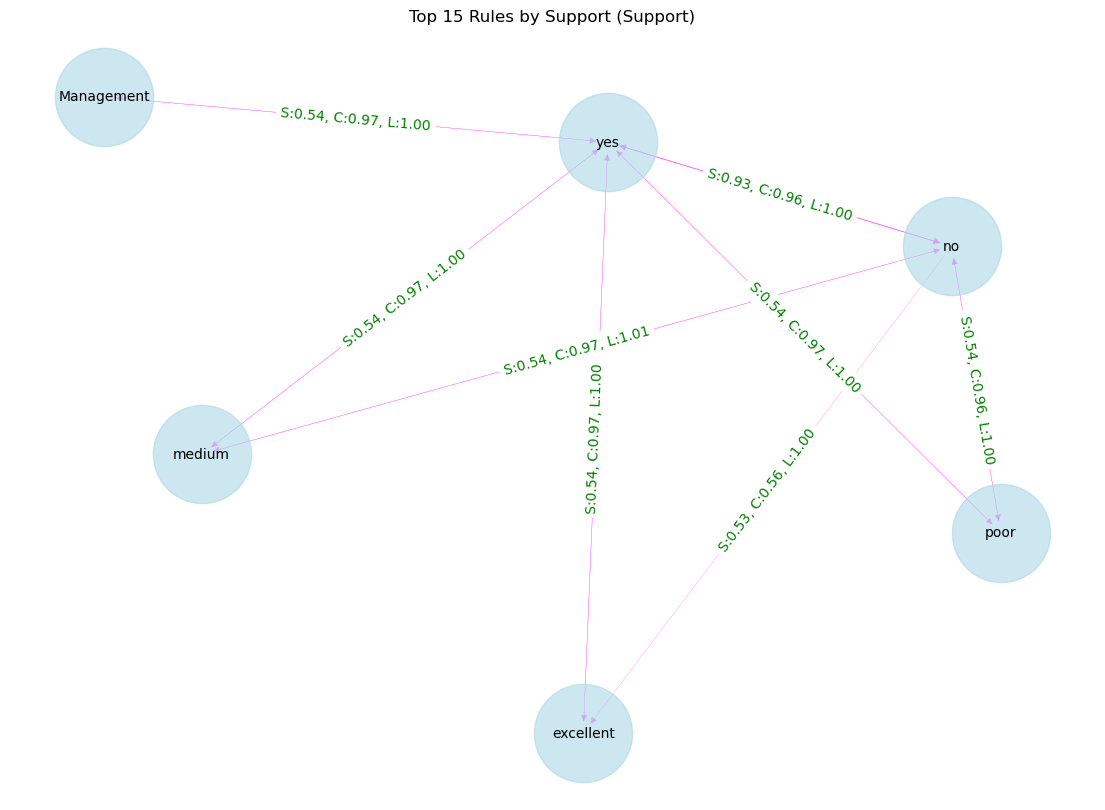

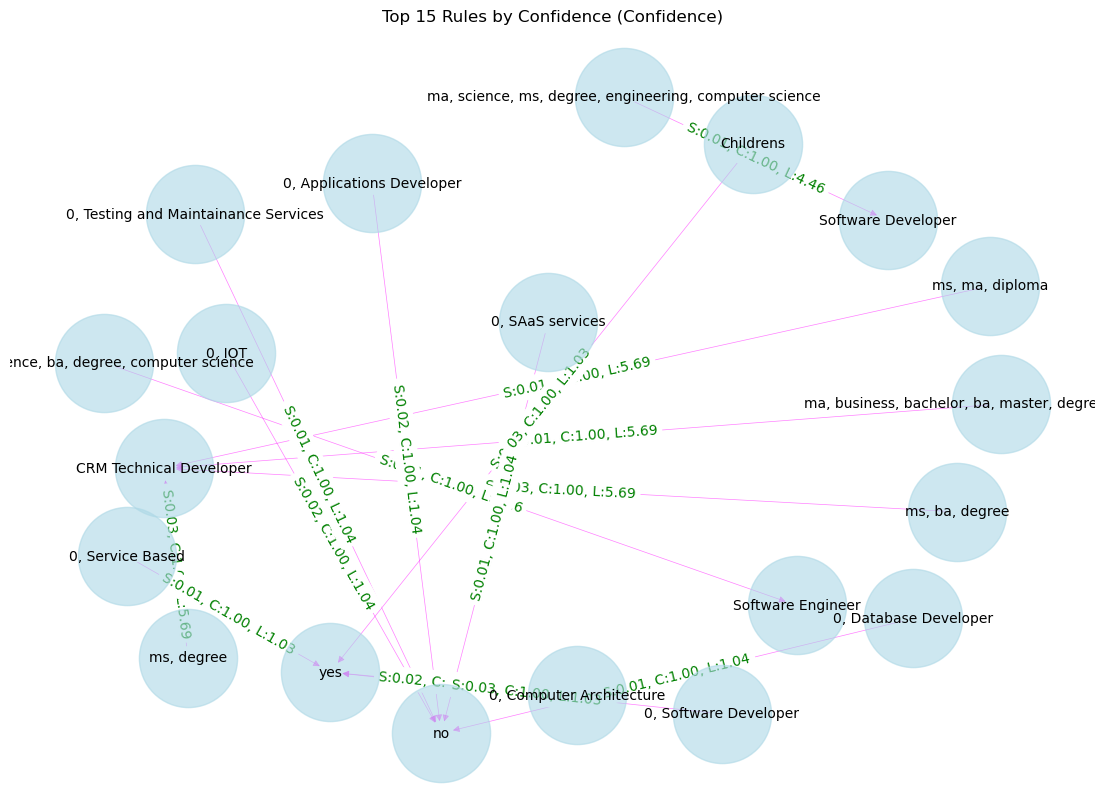

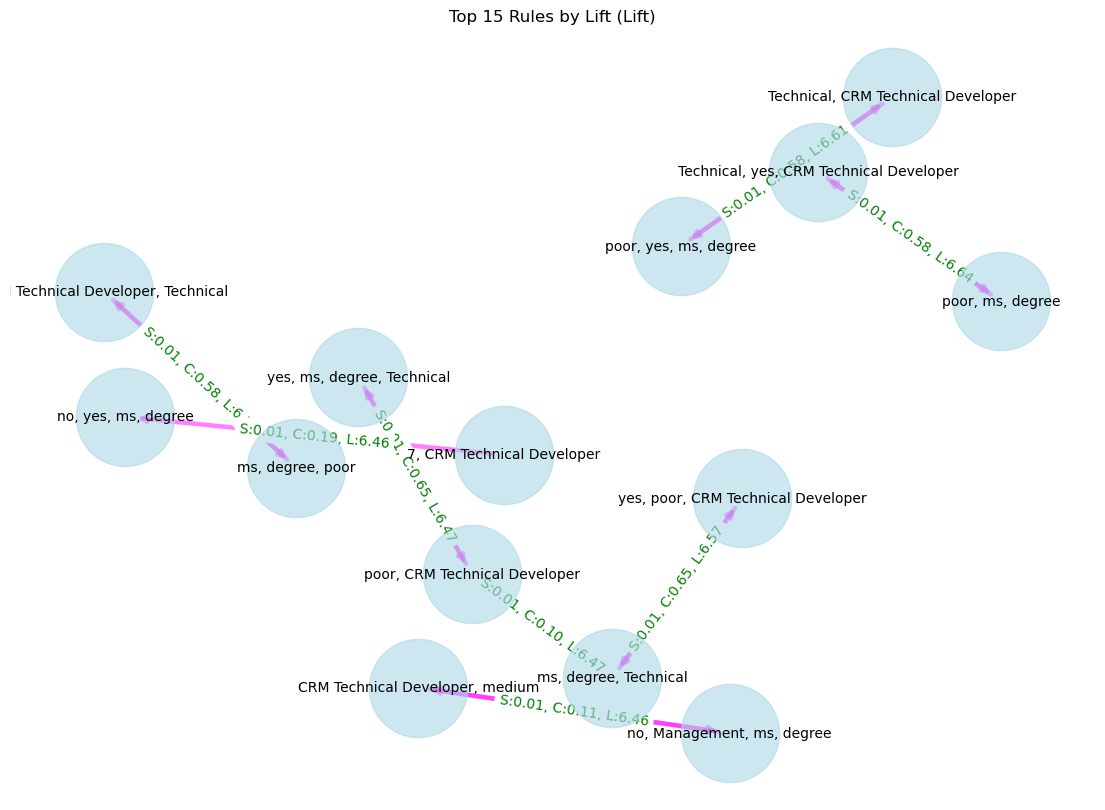

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import networkx as nx

file_path = 'C:/CUB/sem2/ml/proj/CN_Dataset/cleaned_data.csv'
data = pd.read_csv(file_path)

transaction_list = data.apply(lambda x: x.dropna().astype(str).tolist(), axis=1)

encoder = TransactionEncoder()
encoded_array = encoder.fit_transform(transaction_list)
transaction_df = pd.DataFrame(encoded_array, columns=encoder.columns_)

transaction_df.to_csv('C:/CUB/sem2/ml/proj/CN_Dataset/prepared_transaction_data.csv', index=False)
print("Transaction data has been prepared and saved.")

print(transaction_df.head())

frequent_itemsets = apriori(transaction_df, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

rules.to_csv('C:/CUB/sem2/ml/proj/CN_Dataset/association_rules.csv', index=False)
print("Association rules have been saved.")

def visualize_association_rules(rules_df, measure='lift', top_n=15, graph_title=''):
    top_rules = rules_df.nlargest(top_n, measure)

    # Setup plot
    plt.figure(figsize=(14, 10))
    graph = nx.DiGraph()

    for _, rule in top_rules.iterrows():
        antecedents = ', '.join(rule['antecedents'])
        consequents = ', '.join(rule['consequents'])
        graph.add_edge(antecedents, consequents, 
                       weight=rule[measure], 
                       support=rule['support'], 
                       confidence=rule['confidence'], 
                       lift=rule['lift'])

    positions = nx.spring_layout(graph, k=1, iterations=20)
    
    nx.draw_networkx_nodes(graph, positions, node_color='lightblue', node_size=5000, alpha=0.6)
    edge_widths = [graph[u][v]['weight']*0.5 for u, v in graph.edges()]
    nx.draw_networkx_edges(graph, positions, width=edge_widths, alpha=0.5, edge_color='magenta')
    nx.draw_networkx_labels(graph, positions, font_size=10)

    edge_labels = {(u, v): f"S:{d['support']:.2f}, C:{d['confidence']:.2f}, L:{d['lift']:.2f}"
                    for u, v, d in graph.edges(data=True)}
    nx.draw_networkx_edge_labels(graph, positions, edge_labels=edge_labels, font_color='green')
    
    plt.title(f'Top {top_n} Rules by {measure.capitalize()} {graph_title}')
    plt.axis('off')
    plt.show()

visualize_association_rules(rules, 'support', 15, '(Support)')
visualize_association_rules(rules, 'confidence', 15, '(Confidence)')
visualize_association_rules(rules, 'lift', 15, '(Lift)')
